In [33]:
import numpy as np
from scipy import sparse
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [34]:
train_df = pd.read_csv("../data/train.csv")
valid_df = pd.read_csv("../data/valid.csv")
test_df = pd.read_csv("../data/test.csv")

y_train = train_df["toxic"]
y_valid = valid_df["toxic"]
y_test = test_df["toxic"]

HÀM ĐÁNH GIÁ MÔ HÌNH

In [35]:
def evaluate_model(model_name, model, x_test, y_test):
    """Đánh giá mô hình sau khi train xong"""
    y_pred = model.predict(x_test)

    print(f"\n=================  {model_name} =================")
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Non-toxic", "Toxic"]))

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-toxic', 'toxic'])
    disp.plot(cmap=plt.cm.Blues)

    plt.title(f"SVM with {model_name}")
    plt.show()

HÀM TRAIN VÀ ĐÁNH GIÁ SVM

In [36]:
def train_and_evaluate(model_name, x_train, y_train, x_valid, y_valid, x_test, y_test):
    # Khởi tạo mô hình SVM tuyến tính
    svm = LinearSVC(random_state=42, max_iter=1000, class_weight='balanced', penalty='l2')

    # Train mô hình
    svm.fit(x_train, y_train)

    # Đánh giá trên tập validation
    y_valid_pred = svm.predict(x_valid)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    print(f" Validation Accuracy ({model_name}): {valid_acc:.4f}")

    # Đánh giá chi tiết trên tập test
    evaluate_model(model_name, svm, x_test, y_test)

BAG OF WORDS


Training with Bag of Words
 Validation Accuracy (Bag of Words): 0.8547

=================  Bag of Words =================
 Accuracy: 0.867687074829932

 Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.94      0.89      0.92      9409
       Toxic       0.64      0.76      0.70      2351

    accuracy                           0.87     11760
   macro avg       0.79      0.83      0.81     11760
weighted avg       0.88      0.87      0.87     11760



C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


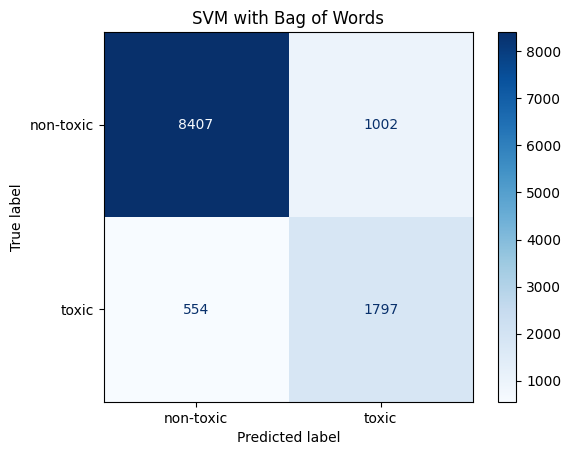

In [37]:
print("\n==============================")
print("Training with Bag of Words")
print("==============================")

x_train = sparse.load_npz("../embedded/bow/train.npz")
x_valid = sparse.load_npz("../embedded/bow/valid.npz")
x_test  = sparse.load_npz("../embedded/bow/test.npz")

train_and_evaluate("Bag of Words", x_train, y_train, x_valid, y_valid, x_test, y_test)

TF-IDF


Training with TF-IDF


 Validation Accuracy (TF-IDF): 0.8558

=================  TF-IDF =================
 Accuracy: 0.8668367346938776

 Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.95      0.89      0.91      9409
       Toxic       0.63      0.79      0.70      2351

    accuracy                           0.87     11760
   macro avg       0.79      0.84      0.81     11760
weighted avg       0.88      0.87      0.87     11760



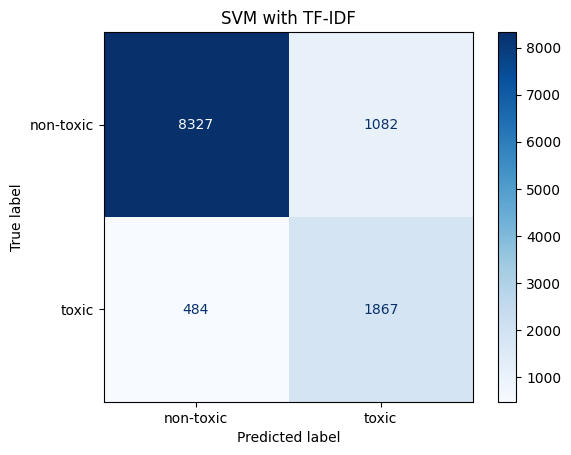

In [38]:
print("\n==============================")
print("Training with TF-IDF")
print("==============================")

x_train = sparse.load_npz("../embedded/tfidf/train.npz")
x_valid = sparse.load_npz("../embedded/tfidf/valid.npz")
x_test  = sparse.load_npz("../embedded/tfidf/test.npz")

train_and_evaluate("TF-IDF", x_train, y_train, x_valid, y_valid, x_test, y_test)

TRANSFORMER EMBEDDING


Training with Multilingual-e5-large
 Validation Accuracy (Multilingual-e5-large): 0.8055

=================  Multilingual-e5-large =================
 Accuracy: 0.8025510204081633

 Classification Report:
              precision    recall  f1-score   support

   Non-toxic       0.94      0.80      0.87      9409
       Toxic       0.50      0.81      0.62      2351

    accuracy                           0.80     11760
   macro avg       0.72      0.80      0.74     11760
weighted avg       0.86      0.80      0.82     11760



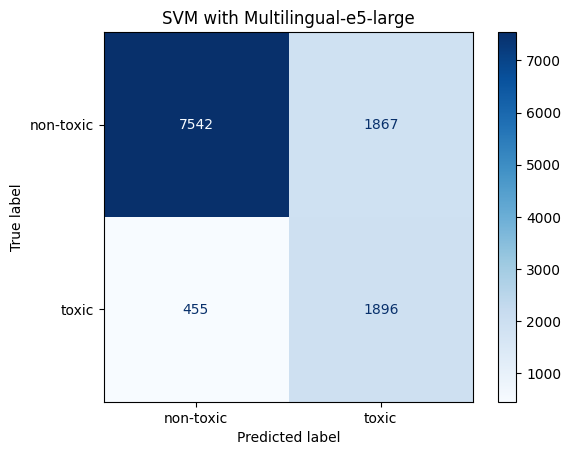

In [39]:
print("\n==============================")
print("Training with Multilingual-e5-large")
print("==============================")

x_train = np.load("../embedded/multilingual-e5-large/train.npy")
x_valid = np.load("../embedded/multilingual-e5-large/valid.npy")
x_test  = np.load("../embedded/multilingual-e5-large/test.npy")

train_and_evaluate("Multilingual-e5-large", x_train, y_train, x_valid, y_valid, x_test, y_test)